## Plot observations and model predictors at a specific site
Last updated: Kevin Varga, 12/30/2024

**Inputs:**
* CSV of observations and predictors for specific fuel type

**Outputs:**
* Plot of site observations and 9 predictors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
pred_path = '/home/sbarc/students/varga/nasa/ch1/data/site_predictors/'

In [3]:
fuel_type = 'chamise'
# Read in predictor dataframe
all_sites_predictors = pd.read_csv(pred_path + fuel_type + '.csv', index_col=[0,1], parse_dates=True, infer_datetime_format=True)

In [4]:
# Subset to site and time period
site_name = 'sisar_canyon_upper_ojai_valley'
start_date = '2008-12-01'
end_date = '2018-01-01'
subset_predictors = all_sites_predictors.loc[(site_name, slice(start_date, end_date)), :]
# Drop unneeded columns
subset_predictors = subset_predictors.drop(columns=['latitude','longitude','fuel'])

In [5]:
# Convert temperature to celcius
subset_predictors.loc[:,'temp90mean'] = subset_predictors['temp90mean'] - 273.15

In [6]:
# Order predictors
col_order = ['percent','precip90sum','temp90mean','rad150mean','daylength',
             'nirv','somo7mean','rh150mean','cwd90sum','precip30sum']
subset_predictors = subset_predictors[col_order]

In [7]:
# Create plot labels
ylabels = ['Live Fuel Moisture (%)','Precipitation 90-day sum (mm)','Temperature 90-day mean (C)',
           'Solar Radiation 150-day mean (W/m2)','Daylength (hrs)','NIRv',
           'Soil Moisture 7-day mean (m3/m3)','Relative Humidity 150-day mean (%)',
           'Climatic Water Deficit 90-day sum (mm)','Precip 30-day sum (mm)']

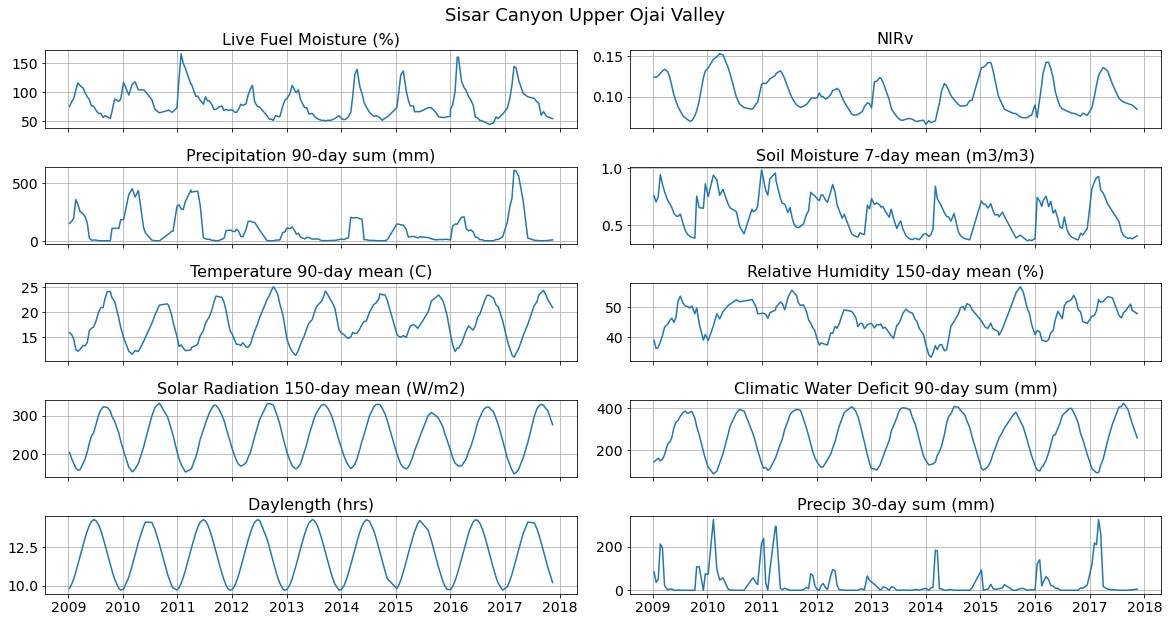

In [8]:
# Create plot
fig, axs = plt.subplots(5, 2, figsize=(20, 10), sharex=True, facecolor='white')

# Adjust vertical spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.1)

# Plot the other columns
for i, col in enumerate(subset_predictors.columns):
    ax = axs[i % 5, i // 5]
    ax.plot(subset_predictors.index.get_level_values('date'), subset_predictors[col])
    ax.set_title(ylabels[i], fontsize=16)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    ax.tick_params(axis='y', labelsize=14) #, labelweight='bold')
    ax.tick_params(axis='x', labelsize=14)
    ax.grid(True)
    

# Create title for entire figure
plt.suptitle(site_name.replace('_',' ').title(), fontsize=18, y=0.94)

# Adjust layout
#plt.tight_layout()
plt.show()
#fig.savefig(output_path + 'chamise/' + site_name + '_predictors.png', dpi = 500, bbox_inches='tight');